In [2086]:
import pandas as pd
import codecs
import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import operator as op
import tensorflow as tf
import sys
from collections import namedtuple

import matplotlib.font_manager as fm
#fm.findSystemFonts()

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [1542]:
# フォルダ内の絶対ファイルパス返す
def get_filepath(path):
    return [os.path.abspath(p) for p in glob.glob(path)]

In [1543]:
# ファイル読み込み（全年結合）
count = 1
for path in get_filepath('./data/1321/*.csv'):
    with codecs.open(path, "r", "Shift-JIS", "ignore") as file:
        if count == 1:
            df = pd.read_table(file, delimiter=",", header = 1, index_col='日付', parse_dates=['日付'])
        else:
            df = pd.concat([df, pd.read_table(file, delimiter=",", header = 1, index_col='日付', parse_dates=['日付'])])
        
        count += 1     

In [76]:
#plt.figure()
#df.plot(subplots=True, figsize=(15, 20))

In [77]:
# 陽陰をdfに追加
#df['target_isPositive'] = (df.iloc[:, 0] - df.iloc[:, 3]) < 0

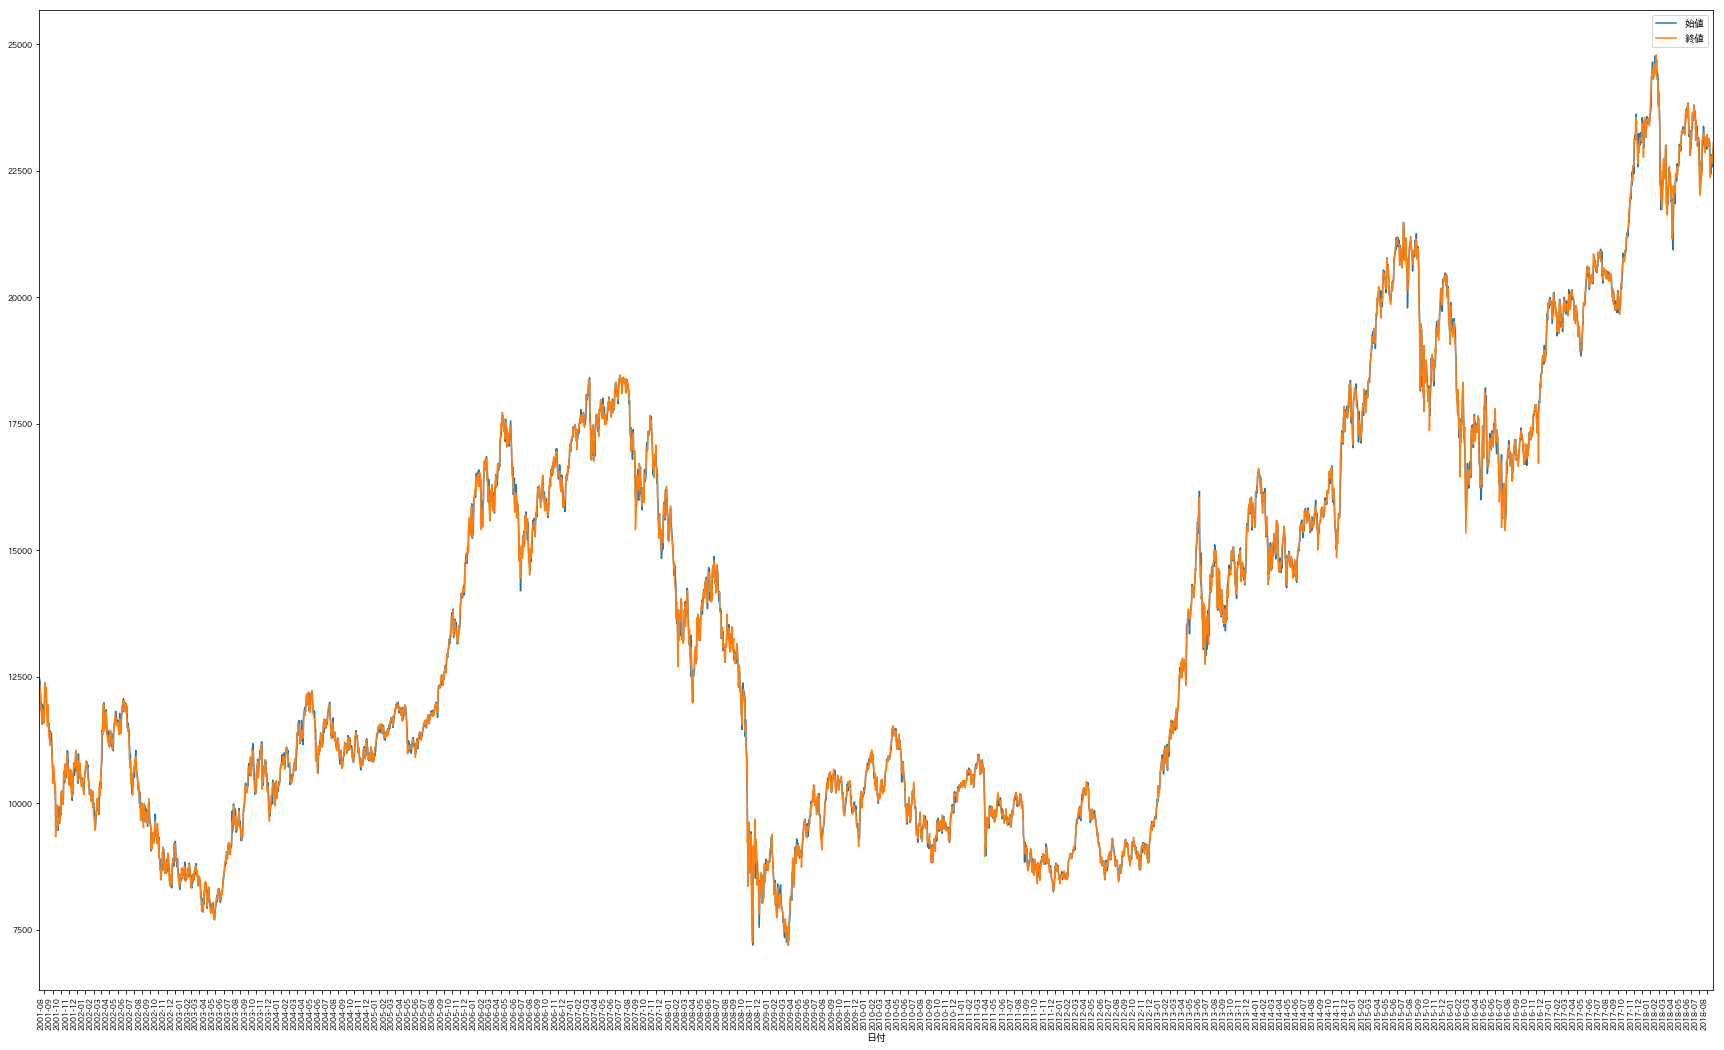

In [1938]:
# １ヶ月ごとの始値、終値の表示
ax = df.plot(y = '始値', figsize=(30, 20), fontsize = 8)
df.plot(y = '終値', ax = ax)

# x軸の範囲を決定
ax.set_xlim([df.index.min(), df.index.max()])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
_=plt.xticks(rotation=90) 

plt.savefig('./pandas_iris_line_dpi.png', dpi=1080)

In [79]:
# True/Falseを1/0に変換
#df.iloc[:, 6] = df.iloc[:, 6] * 1

In [80]:
# 変動幅（終わりー始まり）
#df['variance'] = (df.iloc[:, 3] - df.iloc[:, 0])
#df.plot(y = 'variance', figsize = (20, 30))

In [1544]:
NYDow = pd.read_table('./data/NYdow/DJI.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
NYDow = NYDow.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [1545]:
YenDoll = pd.read_table('./data/為替/quote.csv', delimiter=",", header = 2)
YenDoll = YenDoll.drop(columns = ['GBP', 'EUR', 'CAD', 'CHF', 'SEK', 'DKK', 'NOK',
       'AUD', 'NZD', 'ZAR', 'BHD', 'IDR(100)', 'CNY', 'HKD', 'INR', 'MYR',
       'PHP', 'SGD', 'KRW(100)', 'THB', 'KWD', 'SAR', 'AED', 'MXN', 'PGK',
       'HUF', 'CZK', 'PLN', 'RUB', 'TRY', 'Unnamed: 32', 'IDR(100).1', 'CNY.1',
       'MYR.1', 'KRW(100).1', 'TWD'])
YenDoll['Unnamed: 0'] = pd.to_datetime(YenDoll['Unnamed: 0'])
YenDoll.set_index('Unnamed: 0', inplace=True)

In [1546]:
EURONEXT = pd.read_table('./data/^N100.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
EURONEXT = EURONEXT.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
EURONEXT = EURONEXT.rename(columns={'Open': 'Open_EURONEXT', 'Close': 'Close_EURONEXT'})

In [1547]:
ALLORDS = pd.read_table('./data/^AORD.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
ALLORDS = ALLORDS.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
ALLORDS = ALLORDS.rename(columns={'Open': 'Open_ALLORDS', 'Close': 'Close_ALLORDS'})

In [1548]:
HANGSENG = pd.read_table('./data/^HSI.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
HANGSENG = HANGSENG.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
HANGSENG = HANGSENG.rename(columns={'Open': 'Open_HANGSENG', 'Close': 'Close_HANGSENG'})

In [1549]:
DAX = pd.read_table('./data/^GDAXI.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
DAX = DAX.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
DAX = DAX.rename(columns={'Open': 'Open_DAX', 'Close': 'Close_DAX'})

In [1550]:
NYSE = pd.read_table('./data/^NYA.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
NYSE = NYSE.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
NYSE = NYSE.rename(columns={'Open': 'Open_NYSE', 'Close': 'Close_NYSE'})

In [1551]:
SP500 = pd.read_table('./data/^GSPC.csv', delimiter=",", index_col='Date', parse_dates=['Date'])
SP500 = SP500.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'])
SP500 = SP500.rename(columns={'Open': 'Open_SP500', 'Close': 'Close_SP500'})

In [1552]:
data = pd.DataFrame()
data = df.merge(NYDow, how = "outer", left_index = True, right_index=True)
data = data.merge(YenDoll, how = "outer", left_index = True, right_index=True)
data = data.merge(EURONEXT, how = "outer", left_index = True, right_index=True)
data = data.merge(ALLORDS, how = "outer", left_index = True, right_index=True)
data = data.merge(HANGSENG, how = "outer", left_index = True, right_index=True)
data = data.merge(DAX, how = "outer", left_index = True, right_index=True)
data = data.merge(NYSE, how = "outer", left_index = True, right_index=True)
data = data.merge(SP500, how = "outer", left_index = True, right_index=True)

In [1558]:
data

,始値,高値,安値,終値,出来高,Close,USD,Open_EURONEXT,Close_EURONEXT,Open_ALLORDS,Close_ALLORDS,Open_HANGSENG,Close_HANGSENG,Open_DAX,Close_DAX,Open_NYSE,Close_NYSE,Open_SP500,Close_SP500
2002-04-02,11200.0,11250.0,11100.0,11230.0,37540.0,10313.709961,133.20,817.280029,812.849976,3363.300049,3338.500000,11032.360352,10878.040039,5379.640137,5311.080078,6305.330078,6305.330078,1146.540039,1136.760010
2002-04-03,11130.0,11530.0,11060.0,11440.0,136770.0,10198.290039,133.20,812.070007,811.590027,3338.899902,3329.000000,10831.230469,10833.959961,5293.370117,5281.839844,6245.689941,6245.689941,1136.760010,1125.400024
2002-04-04,11430.0,11580.0,11380.0,11450.0,165330.0,10235.169922,133.10,807.900024,798.239990,3329.000000,3322.899902,10766.559570,10831.370117,5284.200195,5254.950195,6249.180176,6249.180176,1125.400024,1126.339966
2002-04-05,11430.0,11450.0,11350.0,11410.0,112790.0,10271.639648,132.30,798.159973,794.330017,3322.899902,3340.199951,10766.559570,10831.370117,5250.479980,5260.529785,6246.540039,6246.540039,1126.339966,1122.729980
2002-04-08,11380.0,11470.0,11310.0,11380.0,63710.0,10249.080078,131.55,792.330017,781.780029,3340.199951,3340.300049,10833.160156,10723.679688,5261.370117,5180.330078,6255.839844,6255.839844,1122.729980,1125.290039
2002-04-09,11380.0,11420.0,11170.0,11180.0,152990.0,10208.669922,131.55,787.659973,786.169983,3340.300049,3315.100098,10711.080078,10733.690430,5194.089844,5170.250000,6247.379883,6247.379883,1125.290039,1117.800049
2002-04-10,11130.0,11330.0,11090.0,11250.0,88010.0,10381.730469,130.70,782.840027,794.520020,3315.100098,3327.199951,10692.950195,10643.139648,5169.990234,5265.359863,6315.899902,6315.899902,1117.800049,1130.469971
2002-04-11,11360.0,11380.0,11190.0,11190.0,70100.0,10176.080078,131.10,796.099976,782.260010,3327.199951,3319.800049,10748.450195,10744.910156,5270.350098,5162.959961,6181.189941,6181.189941,1130.469971,1103.689941
2002-04-12,11120.0,11180.0,10950.0,11060.0,238130.0,10190.820313,131.55,783.770020,785.940002,3319.800049,3307.699951,10653.820313,10710.480469,5165.310059,5189.649902,6217.350098,6217.350098,1103.689941,1111.010010
2002-04-15,11040.0,11210.0,11000.0,11210.0,110280.0,10093.669922,132.20,788.419983,790.919983,3307.699951,3319.600098,10720.410156,10727.980469,5194.939941,5244.200195,6173.470215,6173.470215,1111.010010,1102.550049


In [1554]:
data = data[data.index >= '2002-04-02']
data = data.fillna(method='ffill')

In [1555]:
data = data.drop(columns = ['終値調整値'])

In [1556]:
data.info() # 日経のデータは2018-08-24 まで

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4652 entries, 2002-04-02 to 2018-09-03
Data columns (total 19 columns):
始値                4652 non-null float64
高値                4652 non-null float64
安値                4652 non-null float64
終値                4652 non-null float64
出来高               4652 non-null float64
Close             4652 non-null float64
USD               4652 non-null float64
Open_EURONEXT     4652 non-null float64
Close_EURONEXT    4652 non-null float64
Open_ALLORDS      4652 non-null float64
Close_ALLORDS     4652 non-null float64
Open_HANGSENG     4652 non-null float64
Close_HANGSENG    4652 non-null float64
Open_DAX          4652 non-null float64
Close_DAX         4652 non-null float64
Open_NYSE         4652 non-null float64
Close_NYSE        4652 non-null float64
Open_SP500        4652 non-null float64
Close_SP500       4652 non-null float64
dtypes: float64(19)
memory usage: 726.9 KB


In [93]:
#data.describe()

In [94]:
# １ヶ月ごとの始値、終値の表示
#ax = data.plot(y = '終値', figsize=(30, 20), fontsize = 8)
#data.plot(y = 'Close', ax = ax)

# x軸の範囲を決定
#ax.set_xlim([data.index.min(), data.index.max()])

# set monthly locator
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()
#_=plt.xticks(rotation=90) 

In [1522]:
# 前日差+自然対数を取る
log_data = pd.DataFrame()

log_data['nikkei_diff_open_close_pos'] = (data['終値'] >= data['始値']) * 1 # target 
log_data['nikkei_diff_open_close_neg'] = (data['終値'] <  data['始値']) * 1# target 
log_data['nikkei_open_log'] = np.log(data['始値'] / data['始値'].shift())
log_data['nikkei_high_log'] = np.log(data['高値'] / data['高値'].shift())
log_data['nikkei_low_log'] = np.log(data['安値'] / data['安値'].shift())
log_data['nikkei_close_log'] = np.log(data['終値'] / data['終値'].shift())
log_data['nydow_close_log'] = np.log(data['Close'] / data['Close'].shift())
log_data['nikkei_volume'] = np.log(data['出来高'] / data['出来高'].shift())
log_data['exchange'] = np.log(data['USD'] / data['USD'].shift())
log_data['Close_EURONEXT_log'] = np.log(data['Close_EURONEXT'] / data['Close_EURONEXT'].shift())
log_data['Close_ALLORDS_log'] = np.log(data['Close_ALLORDS'] / data['Close_ALLORDS'].shift())
log_data['Close_HANGSENG_log'] = np.log(data['Close_HANGSENG'] / data['Close_HANGSENG'].shift())
log_data['Close_DAX_log'] = np.log(data['Close_DAX'] / data['Close_DAX'].shift())
log_data['Close_NYSE_log'] = np.log(data['Close_NYSE'] / data['Close_NYSE'].shift())
log_data['Close_SP500_log'] = np.log(data['Close_SP500'] / data['Close_SP500'].shift())

In [2017]:
#### 前日差+自然対数を取る
log_data = pd.DataFrame()

#log_data['nikkei_diff_open_close'] = data['終値'] - data['始値']
log_data['nikkei_diff_open_close_pos'] = (data['終値'] >= data['始値']) * 1 # target 
log_data['nikkei_diff_open_close_neg'] = (data['終値'] <  data['始値']) * 1# target
log_data['nikkei_open_log'] = np.log(data['始値'] / data['始値'].shift())
log_data['nikkei_high_log'] = np.log(data['高値'] / data['高値'].shift())
log_data['nikkei_low_log'] = np.log(data['安値'] / data['安値'].shift())
log_data['nikkei_close_log'] = np.log(data['終値'] / data['終値'].shift())
log_data['nydow_close_log'] = np.log(data['Close'] / data['Close'].shift())
log_data['nikkei_volume'] = np.log(data['出来高'] / data['出来高'].shift())
log_data['exchange'] = np.log(data['USD'] / data['USD'].shift())
log_data['Close_EURONEXT_log'] = np.log(data['Close_EURONEXT'] / data['Close_EURONEXT'].shift())
log_data['Close_ALLORDS_log'] = np.log(data['Close_ALLORDS'] / data['Close_ALLORDS'].shift())
log_data['Close_HANGSENG_log'] = np.log(data['Close_HANGSENG'] / data['Close_HANGSENG'].shift())
log_data['Close_DAX_log'] = np.log(data['Close_DAX'] / data['Close_DAX'].shift())
log_data['Close_NYSE_log'] = np.log(data['Close_NYSE'] / data['Close_NYSE'].shift())
log_data['Close_SP500_log'] = np.log(data['Close_SP500'] / data['Close_SP500'].shift())

log_data['nikkei_diff_open_close_log'] = np.log(data['終値'] / data['始値'])
log_data['Close_EURONEXT_diff_log'] = np.log(data['Close_EURONEXT'] / data['Open_EURONEXT'])
log_data['Close_ALLORDS_diff_log'] = np.log(data['Close_ALLORDS'] / data['Open_ALLORDS'])
log_data['Close_HANGSENG_diff_log'] = np.log(data['Close_HANGSENG'] / data['Open_HANGSENG'])
log_data['Close_DAX_diff_log'] = np.log(data['Close_DAX'] / data['Open_DAX'])
log_data['Close_NYSE_diff_log'] = np.log(data['Close_NYSE'] / data['Open_NYSE'])
log_data['Close_SP500_diff_log'] = np.log(data['Close_SP500'] / data['Open_SP500'])

In [2018]:
log_data = log_data.drop(log_data.index[log_data.index == log_data.index[0]])

In [1593]:
# 各変数を正規化する
mms = MinMaxScaler()
log_data['nikkei_open_log'] = mms.fit_transform(log_data['nikkei_open_log'].values.reshape(-1, 1))
log_data['nikkei_high_log'] = mms.fit_transform(log_data['nikkei_high_log'].values.reshape(-1, 1))
log_data['nikkei_low_log'] = mms.fit_transform(log_data['nikkei_low_log'].values.reshape(-1, 1))
log_data['nikkei_close_log'] = mms.fit_transform(log_data['nikkei_close_log'].values.reshape(-1, 1))
log_data['nydow_close_log'] = mms.fit_transform(log_data['nydow_close_log'].values.reshape(-1, 1))
log_data['nikkei_volume'] = mms.fit_transform(log_data['nikkei_volume'].values.reshape(-1, 1))
log_data['exchange'] = mms.fit_transform(log_data['exchange'].values.reshape(-1, 1))
log_data['Close_EURONEXT_log'] = mms.fit_transform(log_data['Close_EURONEXT_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_log'] = mms.fit_transform(log_data['Close_ALLORDS_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_log'] = mms.fit_transform(log_data['Close_HANGSENG_log'].values.reshape(-1, 1))
log_data['Close_DAX_log'] = mms.fit_transform(log_data['Close_DAX_log'].values.reshape(-1, 1))
log_data['Close_NYSE_log'] = mms.fit_transform(log_data['Close_NYSE_log'].values.reshape(-1, 1))
log_data['Close_SP500_log'] = mms.fit_transform(log_data['Close_SP500_log'].values.reshape(-1, 1))

In [1962]:
# 各変数を正規化する
mms = MinMaxScaler()
log_data['nikkei_open_log'] = mms.fit_transform(log_data['nikkei_open_log'].values.reshape(-1, 1))
log_data['nikkei_high_log'] = mms.fit_transform(log_data['nikkei_high_log'].values.reshape(-1, 1))
log_data['nikkei_low_log'] = mms.fit_transform(log_data['nikkei_low_log'].values.reshape(-1, 1))
log_data['nikkei_close_log'] = mms.fit_transform(log_data['nikkei_close_log'].values.reshape(-1, 1))
log_data['nydow_close_log'] = mms.fit_transform(log_data['nydow_close_log'].values.reshape(-1, 1))
log_data['nikkei_volume'] = mms.fit_transform(log_data['nikkei_volume'].values.reshape(-1, 1))
log_data['exchange'] = mms.fit_transform(log_data['exchange'].values.reshape(-1, 1))
log_data['Close_EURONEXT_log'] = mms.fit_transform(log_data['Close_EURONEXT_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_log'] = mms.fit_transform(log_data['Close_ALLORDS_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_log'] = mms.fit_transform(log_data['Close_HANGSENG_log'].values.reshape(-1, 1))
log_data['Close_DAX_log'] = mms.fit_transform(log_data['Close_DAX_log'].values.reshape(-1, 1))
log_data['Close_NYSE_log'] = mms.fit_transform(log_data['Close_NYSE_log'].values.reshape(-1, 1))
log_data['Close_SP500_log'] = mms.fit_transform(log_data['Close_SP500_log'].values.reshape(-1, 1))

log_data['nikkei_diff_open_close_log'] = mms.fit_transform(log_data['nikkei_diff_open_close_log'].values.reshape(-1, 1))
log_data['Close_EURONEXT_diff_log'] = mms.fit_transform(log_data['Close_EURONEXT_diff_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_diff_log'] = mms.fit_transform(log_data['Close_ALLORDS_diff_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_diff_log'] = mms.fit_transform(log_data['Close_HANGSENG_diff_log'].values.reshape(-1, 1))
log_data['Close_DAX_diff_log'] = mms.fit_transform(log_data['Close_DAX_diff_log'].values.reshape(-1, 1))
log_data['Close_NYSE_diff_log'] = mms.fit_transform(log_data['Close_NYSE_diff_log'].values.reshape(-1, 1))
log_data['Close_SP500_diff_log'] = mms.fit_transform(log_data['Close_SP500_diff_log'].values.reshape(-1, 1))

In [1592]:
#### 各変数を標準化する（X-μ/σ)
sc = StandardScaler()
log_data['nikkei_diff_open_close'] = sc.fit_transform(log_data['nikkei_diff_open_close'].values.reshape(-1, 1))
log_data['nikkei_open_log'] = sc.fit_transform(log_data['nikkei_open_log'].values.reshape(-1, 1))
log_data['nikkei_high_log'] = sc.fit_transform(log_data['nikkei_high_log'].values.reshape(-1, 1))
log_data['nikkei_low_log'] = sc.fit_transform(log_data['nikkei_low_log'].values.reshape(-1, 1))
log_data['nikkei_close_log'] = sc.fit_transform(log_data['nikkei_close_log'].values.reshape(-1, 1))
log_data['nydow_close_log'] = sc.fit_transform(log_data['nydow_close_log'].values.reshape(-1, 1))
log_data['nikkei_volume'] = sc.fit_transform(log_data['nikkei_volume'].values.reshape(-1, 1))
log_data['exchange'] = sc.fit_transform(log_data['exchange'].values.reshape(-1, 1))
log_data['Close_EURONEXT_log'] = sc.fit_transform(log_data['Close_EURONEXT_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_log'] = sc.fit_transform(log_data['Close_ALLORDS_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_log'] = sc.fit_transform(log_data['Close_HANGSENG_log'].values.reshape(-1, 1))
log_data['Close_DAX_log'] = sc.fit_transform(log_data['Close_DAX_log'].values.reshape(-1, 1))
log_data['Close_NYSE_log'] = sc.fit_transform(log_data['Close_NYSE_log'].values.reshape(-1, 1))
log_data['Close_SP500_log'] = sc.fit_transform(log_data['Close_SP500_log'].values.reshape(-1, 1))

KeyError: 'nikkei_diff_open_close'

In [2019]:
# 各変数を標準化する（X-μ/σ)
sc = StandardScaler()
log_data['nikkei_open_log'] = sc.fit_transform(log_data['nikkei_open_log'].values.reshape(-1, 1))
log_data['nikkei_high_log'] = sc.fit_transform(log_data['nikkei_high_log'].values.reshape(-1, 1))
log_data['nikkei_low_log'] = sc.fit_transform(log_data['nikkei_low_log'].values.reshape(-1, 1))
log_data['nikkei_close_log'] = sc.fit_transform(log_data['nikkei_close_log'].values.reshape(-1, 1))
log_data['nydow_close_log'] = sc.fit_transform(log_data['nydow_close_log'].values.reshape(-1, 1))
log_data['nikkei_volume'] = sc.fit_transform(log_data['nikkei_volume'].values.reshape(-1, 1))
log_data['exchange'] = sc.fit_transform(log_data['exchange'].values.reshape(-1, 1))
log_data['Close_EURONEXT_log'] = sc.fit_transform(log_data['Close_EURONEXT_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_log'] = sc.fit_transform(log_data['Close_ALLORDS_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_log'] = sc.fit_transform(log_data['Close_HANGSENG_log'].values.reshape(-1, 1))
log_data['Close_DAX_log'] = sc.fit_transform(log_data['Close_DAX_log'].values.reshape(-1, 1))
log_data['Close_NYSE_log'] = sc.fit_transform(log_data['Close_NYSE_log'].values.reshape(-1, 1))
log_data['Close_SP500_log'] = sc.fit_transform(log_data['Close_SP500_log'].values.reshape(-1, 1))

log_data['nikkei_diff_open_close_log'] = sc.fit_transform(log_data['nikkei_diff_open_close_log'].values.reshape(-1, 1))
log_data['Close_EURONEXT_diff_log'] = sc.fit_transform(log_data['Close_EURONEXT_diff_log'].values.reshape(-1, 1))
log_data['Close_ALLORDS_diff_log'] = sc.fit_transform(log_data['Close_ALLORDS_diff_log'].values.reshape(-1, 1))
log_data['Close_HANGSENG_diff_log'] = sc.fit_transform(log_data['Close_HANGSENG_diff_log'].values.reshape(-1, 1))
log_data['Close_DAX_diff_log'] = sc.fit_transform(log_data['Close_DAX_diff_log'].values.reshape(-1, 1))
log_data['Close_NYSE_diff_log'] = sc.fit_transform(log_data['Close_NYSE_diff_log'].values.reshape(-1, 1))
log_data['Close_SP500_diff_log'] = sc.fit_transform(log_data['Close_SP500_diff_log'].values.reshape(-1, 1))

In [1618]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4651 entries, 2002-04-03 to 2018-09-03
Data columns (total 22 columns):
nikkei_diff_open_close_pos    4651 non-null int64
nikkei_diff_open_close_neg    4651 non-null int64
nikkei_open_log               4651 non-null float64
nikkei_high_log               4651 non-null float64
nikkei_low_log                4651 non-null float64
nikkei_close_log              4651 non-null float64
nydow_close_log               4651 non-null float64
nikkei_volume                 4651 non-null float64
exchange                      4651 non-null float64
Close_EURONEXT_log            4651 non-null float64
Close_ALLORDS_log             4651 non-null float64
Close_HANGSENG_log            4651 non-null float64
Close_DAX_log                 4651 non-null float64
Close_NYSE_log                4651 non-null float64
Close_SP500_log               4651 non-null float64
nikkei_diff_open_close_log    4651 non-null float64
Close_EURONEXT_diff_log       4651 non-null flo

In [1310]:
#_ = scatter_matrix(log_data, figsize=(20, 20), diagonal='kde')

In [1042]:
#log_data.corr()

In [1043]:
"""tmp = pd.DataFrame()
tmp['nikkei_open_log'] = log_data['nikkei_open_log'].shift()
tmp['nikkei_high_log'] = log_data['nikkei_high_log'].shift()
tmp['nikkei_low_log'] = log_data['nikkei_low_log'].shift()
tmp['nikkei_close_log'] = log_data['nikkei_close_log'].shift()
tmp['nydow_close_log'] = log_data['nydow_close_log'].shift(2)
tmp['nikkei_volume'] = log_data['nikkei_volume'].shift()
tmp['exchange'] = log_data['exchange'].shift()
tmp['nikkei_diff_open_close_pos'] = (log_data['nikkei_close_log'] >= log_data['nikkei_open_log']) * 1 # target 
tmp['nikkei_diff_open_close_neg'] = (log_data['nikkei_close_log'] <  log_data['nikkei_open_log']) * 1 # target
"""

"tmp = pd.DataFrame()\ntmp['nikkei_open_log'] = log_data['nikkei_open_log'].shift()\ntmp['nikkei_high_log'] = log_data['nikkei_high_log'].shift()\ntmp['nikkei_low_log'] = log_data['nikkei_low_log'].shift()\ntmp['nikkei_close_log'] = log_data['nikkei_close_log'].shift()\ntmp['nydow_close_log'] = log_data['nydow_close_log'].shift(2)\ntmp['nikkei_volume'] = log_data['nikkei_volume'].shift()\ntmp['exchange'] = log_data['exchange'].shift()\ntmp['nikkei_diff_open_close_pos'] = (log_data['nikkei_close_log'] >= log_data['nikkei_open_log']) * 1 # target \ntmp['nikkei_diff_open_close_neg'] = (log_data['nikkei_close_log'] <  log_data['nikkei_open_log']) * 1 # target\n"

In [1044]:
#tmp.corr()

In [1045]:
#_ = scatter_matrix(tmp, figsize=(20, 20), diagonal='kde')

In [1046]:
VARIABLE_LABEL = ['nikkei_diff_open_close_pos', 'nikkei_diff_open_close_neg', 
                  'nikkei_open_log_1', 'nikkei_open_log_2', 'nikkei_open_log_3',
                  'nikkei_high_log_1', 'nikkei_high_log_2', 'nikkei_high_log_3',
                  'nikkei_low_log_1', 'nikkei_low_log_2', 'nikkei_low_log_3',
                  'nikkei_close_log_1', 'nikkei_close_log_2', 'nikkei_close_log_3',
                  'nydow_close_log_1', 'nydow_close_log_2', 'nydow_close_log_3',
                  'nikkei_volume_1', 'nikkei_volume_2', 'nikkei_volume_3',
                  'exchange_1', 'exchange_2', 'exchange_3',]

In [1047]:
log_data.columns

Index(['nikkei_diff_open_close_pos', 'nikkei_diff_open_close_neg',
       'nikkei_open_log', 'nikkei_high_log', 'nikkei_low_log',
       'nikkei_close_log', 'nydow_close_log', 'nikkei_volume', 'exchange',
       'Close_EURONEXT_log', 'Close_ALLORDS_log', 'Close_HANGSENG_log',
       'Close_DAX_log', 'Close_NYSE_log', 'Close_SP500_log'],
      dtype='object')

In [1602]:
logdata_columns = log_data.columns
VARIABLE_LABEL = []
logged_time = 3
for column in logdata_columns:
    for i in range(1, logged_time + 1):
        VARIABLE_LABEL.append('{}_{}'.format(column, i))

In [1603]:
VARIABLE_LABEL

['nikkei_diff_open_close_pos_1',
 'nikkei_diff_open_close_pos_2',
 'nikkei_diff_open_close_pos_3',
 'nikkei_diff_open_close_neg_1',
 'nikkei_diff_open_close_neg_2',
 'nikkei_diff_open_close_neg_3',
 'nikkei_open_log_1',
 'nikkei_open_log_2',
 'nikkei_open_log_3',
 'nikkei_high_log_1',
 'nikkei_high_log_2',
 'nikkei_high_log_3',
 'nikkei_low_log_1',
 'nikkei_low_log_2',
 'nikkei_low_log_3',
 'nikkei_close_log_1',
 'nikkei_close_log_2',
 'nikkei_close_log_3',
 'nydow_close_log_1',
 'nydow_close_log_2',
 'nydow_close_log_3',
 'nikkei_volume_1',
 'nikkei_volume_2',
 'nikkei_volume_3',
 'exchange_1',
 'exchange_2',
 'exchange_3',
 'Close_EURONEXT_log_1',
 'Close_EURONEXT_log_2',
 'Close_EURONEXT_log_3',
 'Close_ALLORDS_log_1',
 'Close_ALLORDS_log_2',
 'Close_ALLORDS_log_3',
 'Close_HANGSENG_log_1',
 'Close_HANGSENG_log_2',
 'Close_HANGSENG_log_3',
 'Close_DAX_log_1',
 'Close_DAX_log_2',
 'Close_DAX_log_3',
 'Close_NYSE_log_1',
 'Close_NYSE_log_2',
 'Close_NYSE_log_3',
 'Close_SP500_log_1',


In [2020]:
training_test_data = pd.DataFrame()
training_test_data['nikkei_diff_open_close_pos'] = log_data['nikkei_diff_open_close_pos']
training_test_data['nikkei_diff_open_close_neg'] = log_data['nikkei_diff_open_close_neg']

training_test_data['nikkei_open_log_1'] = log_data['nikkei_open_log'].shift(1)
training_test_data['nikkei_open_log_2'] = log_data['nikkei_open_log'].shift(2)
training_test_data['nikkei_open_log_3'] = log_data['nikkei_open_log'].shift(3)

training_test_data['nikkei_high_log_1'] = log_data['nikkei_high_log'].shift(1)
training_test_data['nikkei_high_log_2'] = log_data['nikkei_high_log'].shift(2)
training_test_data['nikkei_high_log_3'] = log_data['nikkei_high_log'].shift(3)

training_test_data['nikkei_low_log_1'] = log_data['nikkei_low_log'].shift(1)
training_test_data['nikkei_low_log_2'] = log_data['nikkei_low_log'].shift(2)
training_test_data['nikkei_low_log_3'] = log_data['nikkei_low_log'].shift(3)

training_test_data['nikkei_close_log_1'] = log_data['nikkei_close_log'].shift(1)
training_test_data['nikkei_close_log_2'] = log_data['nikkei_close_log'].shift(2)
training_test_data['nikkei_close_log_3'] = log_data['nikkei_close_log'].shift(3)

training_test_data['nydow_close_log_1'] = log_data['nydow_close_log'].shift(1)
training_test_data['nydow_close_log_2'] = log_data['nydow_close_log'].shift(2)
training_test_data['nydow_close_log_3'] = log_data['nydow_close_log'].shift(3)

training_test_data['nikkei_volume_1'] = log_data['nikkei_volume'].shift(1)
training_test_data['nikkei_volume_2'] = log_data['nikkei_volume'].shift(2)
training_test_data['nikkei_volume_3'] = log_data['nikkei_volume'].shift(3)

training_test_data['exchange_1'] = log_data['exchange'].shift(1)
training_test_data['exchange_2'] = log_data['exchange'].shift(2)
training_test_data['exchange_3'] = log_data['exchange'].shift(3)

training_test_data['Close_EURONEXT_log_1'] = log_data['Close_EURONEXT_log'].shift(1)
training_test_data['Close_EURONEXT_log_2'] = log_data['Close_EURONEXT_log'].shift(2)
training_test_data['Close_EURONEXT_log_3'] = log_data['Close_EURONEXT_log'].shift(3)

training_test_data['Close_ALLORDS_log_1'] = log_data['Close_ALLORDS_log'].shift(1)
training_test_data['Close_ALLORDS_log_2'] = log_data['Close_ALLORDS_log'].shift(2)
training_test_data['Close_ALLORDS_log_3'] = log_data['Close_ALLORDS_log'].shift(3)

training_test_data['Close_HANGSENG_log_1'] = log_data['Close_HANGSENG_log'].shift(1)
training_test_data['Close_HANGSENG_log_2'] = log_data['Close_HANGSENG_log'].shift(2)
training_test_data['Close_HANGSENG_log_3'] = log_data['Close_HANGSENG_log'].shift(3)

training_test_data['Close_DAX_log_1'] = log_data['Close_DAX_log'].shift(1)
training_test_data['Close_DAX_log_2'] = log_data['Close_DAX_log'].shift(2)
training_test_data['Close_DAX_log_3'] = log_data['Close_DAX_log'].shift(3)

training_test_data['Close_NYSE_log_1'] = log_data['Close_NYSE_log'].shift(1)
training_test_data['Close_NYSE_log_2'] = log_data['Close_NYSE_log'].shift(2)
training_test_data['Close_NYSE_log_3'] = log_data['Close_NYSE_log'].shift(3)

training_test_data['Close_SP500_log_1'] = log_data['Close_SP500_log'].shift(1)
training_test_data['Close_SP500_log_2'] = log_data['Close_SP500_log'].shift(2)
training_test_data['Close_SP500_log_3'] = log_data['Close_SP500_log'].shift(3)

training_test_data['nikkei_diff_open_close_log_1'] = log_data['nikkei_diff_open_close_log'].shift(1)
training_test_data['nikkei_diff_open_close_log_2'] = log_data['nikkei_diff_open_close_log'].shift(2)
training_test_data['nikkei_diff_open_close_log_3'] = log_data['nikkei_diff_open_close_log'].shift(3)

training_test_data['Close_EURONEXT_diff_log_1'] = log_data['Close_EURONEXT_diff_log'].shift(1)
training_test_data['Close_EURONEXT_diff_log_2'] = log_data['Close_EURONEXT_diff_log'].shift(2)
training_test_data['Close_EURONEXT_diff_log_3'] = log_data['Close_EURONEXT_diff_log'].shift(3)

training_test_data['Close_ALLORDS_diff_log_1'] = log_data['Close_ALLORDS_diff_log'].shift(1)
training_test_data['Close_ALLORDS_diff_log_2'] = log_data['Close_ALLORDS_diff_log'].shift(2)
training_test_data['Close_ALLORDS_diff_log_3'] = log_data['Close_ALLORDS_diff_log'].shift(3)

training_test_data['Close_HANGSENG_diff_log_1'] = log_data['Close_HANGSENG_diff_log'].shift(1)
training_test_data['Close_HANGSENG_diff_log_2'] = log_data['Close_HANGSENG_diff_log'].shift(2)
training_test_data['Close_HANGSENG_diff_log_3'] = log_data['Close_HANGSENG_diff_log'].shift(3)

training_test_data['Close_DAX_diff_log_1'] = log_data['Close_DAX_diff_log'].shift(1)
training_test_data['Close_DAX_diff_log_2'] = log_data['Close_DAX_diff_log'].shift(2)
training_test_data['Close_DAX_diff_log_3'] = log_data['Close_DAX_diff_log'].shift(3)

training_test_data['Close_NYSE_diff_log_1'] = log_data['Close_NYSE_diff_log'].shift(1)
training_test_data['Close_NYSE_diff_log_2'] = log_data['Close_NYSE_diff_log'].shift(2)
training_test_data['Close_NYSE_diff_log_3'] = log_data['Close_NYSE_diff_log'].shift(3)

training_test_data['Close_SP500_diff_log_1'] = log_data['Close_SP500_diff_log'].shift(1)
training_test_data['Close_SP500_diff_log_2'] = log_data['Close_SP500_diff_log'].shift(2)
training_test_data['Close_SP500_diff_log_3'] = log_data['Close_SP500_diff_log'].shift(3)

In [1964]:
training_test_data.corr()

,nikkei_diff_open_close_pos,nikkei_diff_open_close_neg,nikkei_open_log_1,nikkei_open_log_2,nikkei_open_log_3,nikkei_high_log_1,nikkei_high_log_2,nikkei_high_log_3,nikkei_low_log_1,nikkei_low_log_2,...,Close_HANGSENG_diff_log_3,Close_DAX_diff_log_1,Close_DAX_diff_log_2,Close_DAX_diff_log_3,Close_NYSE_diff_log_1,Close_NYSE_diff_log_2,Close_NYSE_diff_log_3,Close_SP500_diff_log_1,Close_SP500_diff_log_2,Close_SP500_diff_log_3
nikkei_diff_open_close_pos,1.000000,-1.000000,0.003149,-0.020630,-0.012794,0.027776,0.001935,-0.028493,0.025201,-0.001352,...,-0.022071,0.038911,0.027785,0.031516,0.006617,0.014178,0.013157,-0.011474,0.029127,0.018208
nikkei_diff_open_close_neg,-1.000000,1.000000,-0.003149,0.020630,0.012794,-0.027776,-0.001935,0.028493,-0.025201,0.001352,...,0.022071,-0.038911,-0.027785,-0.031516,-0.006617,-0.014178,-0.013157,0.011474,-0.029127,-0.018208
nikkei_open_log_1,0.003149,-0.003149,1.000000,-0.022915,-0.025014,0.796902,0.197362,-0.001638,0.770950,0.203053,...,0.030132,0.036917,0.452755,0.045404,0.031561,0.583236,0.054394,-0.017044,0.624905,0.025585
nikkei_open_log_2,-0.020630,0.020630,-0.022915,1.000000,-0.022915,0.039821,0.796901,0.197362,0.019239,0.770950,...,0.345785,0.004903,0.036917,0.452755,-0.036531,0.031561,0.583244,-0.041196,-0.017044,0.624909
nikkei_open_log_3,-0.012794,0.012794,-0.025014,-0.022915,1.000000,-0.016437,0.039821,0.796901,-0.036821,0.019239,...,-0.067842,-0.001805,0.004902,0.036917,0.014715,-0.036531,0.031560,0.002675,-0.041196,-0.017045
nikkei_high_log_1,0.027776,-0.027776,0.796902,0.039821,-0.016437,1.000000,0.080365,0.003901,0.796170,0.161258,...,0.064440,0.074263,0.456582,0.076768,0.086241,0.538540,0.086443,0.039229,0.574745,0.073914
nikkei_high_log_2,0.001935,-0.001935,0.197362,0.796901,0.039821,0.080365,1.000000,0.080365,0.121050,0.796170,...,0.236478,0.008779,0.074263,0.456583,0.000859,0.086241,0.538548,-0.017333,0.039230,0.574748
nikkei_high_log_3,-0.028493,0.028493,-0.001638,0.197362,0.796901,0.003901,0.080365,1.000000,-0.005782,0.121050,...,0.044783,0.012948,0.008778,0.074263,0.012940,0.000859,0.086241,0.001085,-0.017333,0.039229
nikkei_low_log_1,0.025201,-0.025201,0.770950,0.019239,-0.036821,0.796170,0.121050,-0.005782,1.000000,0.036912,...,0.038639,0.064289,0.448455,0.065214,0.080844,0.549412,0.070003,0.037676,0.580005,0.050085
nikkei_low_log_2,-0.001352,0.001352,0.203053,0.770950,0.019239,0.161258,0.796170,0.121050,0.036912,1.000000,...,0.245036,0.014760,0.064289,0.448455,-0.006258,0.080844,0.549420,-0.014844,0.037677,0.580008


In [1940]:
training_test_data = training_test_data.drop(training_test_data.index[training_test_data.index <= '2013-01-01'])
training_test_data = training_test_data.drop(training_test_data.index[training_test_data.index >= '2018-08-24'])

In [2021]:
training_test_data = training_test_data.drop(training_test_data.index[training_test_data.index <= '2002-04-15'])
training_test_data = training_test_data.drop(training_test_data.index[training_test_data.index >= '2018-08-24'])

In [1941]:
training_test_data.describe()

,nikkei_diff_open_close_pos,nikkei_diff_open_close_neg,nikkei_open_log_1,nikkei_open_log_2,nikkei_open_log_3,nikkei_high_log_1,nikkei_high_log_2,nikkei_high_log_3,nikkei_low_log_1,nikkei_low_log_2,...,Close_HANGSENG_diff_log_3,Close_DAX_diff_log_1,Close_DAX_diff_log_2,Close_DAX_diff_log_3,Close_NYSE_diff_log_1,Close_NYSE_diff_log_2,Close_NYSE_diff_log_3,Close_SP500_diff_log_1,Close_SP500_diff_log_2,Close_SP500_diff_log_3
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,...,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,0.535826,0.464174,0.023533,0.023290,0.023533,0.027800,0.027612,0.027564,0.023755,0.023549,...,-0.035313,0.000969,0.000612,0.000123,0.005321,0.006323,0.006044,0.014386,0.015310,0.014659
std,0.498870,0.498870,0.906866,0.906823,0.906761,0.924889,0.924866,0.924866,0.905647,0.905618,...,0.761603,0.695613,0.695661,0.695652,0.582574,0.583710,0.583834,0.639845,0.640899,0.641421
min,0.000000,0.000000,-6.532819,-6.532819,-6.532819,-7.287972,-7.287972,-7.287972,-5.810601,-5.810601,...,-3.683484,-3.212344,-3.212344,-3.212344,-8.088452,-8.088452,-8.088452,-3.570770,-3.570770,-3.570770
25%,0.000000,0.000000,-0.364179,-0.364179,-0.361547,-0.317121,-0.317121,-0.317121,-0.346266,-0.346266,...,-0.409871,-0.352421,-0.355324,-0.355324,-0.243405,-0.243405,-0.248333,-0.258651,-0.258651,-0.258958
50%,1.000000,0.000000,-0.011357,-0.011357,-0.011357,-0.013315,-0.013315,-0.013315,-0.011630,-0.011630,...,-0.018260,0.025659,0.025253,0.022194,0.038122,0.038276,0.038276,0.032998,0.032998,0.032998
75%,1.000000,1.000000,0.493807,0.493807,0.493807,0.481552,0.481552,0.481552,0.454433,0.454433,...,0.393814,0.377667,0.377667,0.377558,0.297585,0.298478,0.298478,0.343326,0.343326,0.343326
max,1.000000,1.000000,5.823002,5.823002,5.823002,4.747270,4.747270,4.747270,4.508530,4.508530,...,3.997607,3.472833,3.472833,3.472833,2.558092,2.558092,2.558092,3.169784,3.169784,3.169784


In [1942]:
training_test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1605 entries, 2013-01-02 to 2018-08-23
Data columns (total 62 columns):
nikkei_diff_open_close_pos      1605 non-null int64
nikkei_diff_open_close_neg      1605 non-null int64
nikkei_open_log_1               1605 non-null float64
nikkei_open_log_2               1605 non-null float64
nikkei_open_log_3               1605 non-null float64
nikkei_high_log_1               1605 non-null float64
nikkei_high_log_2               1605 non-null float64
nikkei_high_log_3               1605 non-null float64
nikkei_low_log_1                1605 non-null float64
nikkei_low_log_2                1605 non-null float64
nikkei_low_log_3                1605 non-null float64
nikkei_close_log_1              1605 non-null float64
nikkei_close_log_2              1605 non-null float64
nikkei_close_log_3              1605 non-null float64
nydow_close_log_1               1605 non-null float64
nydow_close_log_2               1605 non-null float64
nydow_close_log

In [2022]:
predictor_vars = training_test_data[training_test_data.columns[2:]]
explained_vars = training_test_data[training_test_data.columns[:2]]

In [2023]:
# 学習用データは0.8 検証用データは0.1 テストは0.1
len_index = len(training_test_data)
training_data_size = int(len_index * 0.8)
val_data_size = int(len_index * 0.1)
test_data_size = int(len_index * 0.1)

training_predictor_vars = predictor_vars[:training_data_size]
training_explained_vars = explained_vars[:training_data_size]

val_predictor_vars = predictor_vars[training_data_size: training_data_size + val_data_size]
val_explained_vars = explained_vars[training_data_size: training_data_size + val_data_size]

test_predictor_vars = predictor_vars[training_data_size + val_data_size:]
test_explained_vars = explained_vars[training_data_size + val_data_size:]

training_explained_vars = training_explained_vars.drop(columns = ['nikkei_diff_open_close_neg'])
val_explained_vars = val_explained_vars.drop(columns = ['nikkei_diff_open_close_neg'])
test_explained_vars = test_explained_vars.drop(columns = ['nikkei_diff_open_close_neg'])
#training_explained_vars_1d = training_explained_vars.values.reshape(-1)
#test_explained_vars_1d = test_explained_vars.values.reshape(-1)

In [1955]:
len(training_explained_vars)

1284

In [2006]:
val_explained_vars

,nikkei_diff_open_close_pos
2015-05-15,0
2015-05-18,1
2015-05-19,1
2015-05-20,1
2015-05-21,0
2015-05-22,1
2015-05-25,1
2015-05-26,1
2015-05-27,1
2015-05-28,0


In [1206]:
def tf_confusion_metrics(model, actual_classes, session, feed_dict):
    '''与えられたネットワークの正解率などを出力する。
    '''
    predictions = tf.argmax(model, 1)
    actuals = tf.argmax(actual_classes, 1)

    ones_like_actuals = tf.ones_like(actuals)
    zeros_like_actuals = tf.zeros_like(actuals)
    ones_like_predictions = tf.ones_like(predictions)
    zeros_like_predictions = tf.zeros_like(predictions)

    tp_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, ones_like_actuals),
                tf.equal(predictions, ones_like_predictions)
            ),
            "float"
        )
    )

    tn_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, zeros_like_actuals),
                tf.equal(predictions, zeros_like_predictions)
            ),
            "float"
        )
    )

    fp_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, zeros_like_actuals),
                tf.equal(predictions, ones_like_predictions)
            ),
            "float"
        )
    )

    fn_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, ones_like_actuals),
                tf.equal(predictions, zeros_like_predictions)
            ),
            "float"
        )
    )

    tp, tn, fp, fn = session.run(
        [tp_op, tn_op, fp_op, fn_op],
        feed_dict
    )

    tpr = float(tp)/(float(tp) + float(fn))
    fpr = float(fp)/(float(tp) + float(fn))

    accuracy = (float(tp) + float(tn))/(float(tp) + float(fp) + float(fn) + float(tn))

    recall = tpr
    if (float(tp) + float(fp)):
        precision = float(tp)/(float(tp) + float(fp))
        f1_score = (2 * (precision * recall)) / (precision + recall)
    else:
        precision = 0
        f1_score = 0

    print('Precision = ', precision)
    print('Recall = ', recall)
    print('F1 Score = ', f1_score)
    print('Accuracy = ', accuracy)

In [1281]:
reset_graph()

sess = tf.Session()

num_predictors = len(training_predictor_vars.columns)
num_explained = len(training_explained_vars.columns)

feature_data = tf.placeholder(tf.float32, shape = [None, num_predictors])
explained_data = tf.placeholder(tf.float32, shape = [None, 2])

weights = tf.Variable(tf.truncated_normal([num_predictors, num_explained], stddev=0.0001))
baiases = tf.Variable(tf.ones([num_explained]))

model = tf.nn.softmax(tf.matmul(feature_data, weights) + baiases)

cost = -tf.reduce_sum(explained_data * tf.log(model))

optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
training_step = optimizer.minimize(cost)

init = tf.global_variables_initializer()
sess.run(init)

In [1282]:
row = 1
correct_prediction = tf.equal(tf.argmax(model, axis=row), tf.argmax(explained_data, axis=row))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(1, 50001):
    sess.run(
        training_step,
        feed_dict = {
            feature_data: training_predictor_vars.values,
            explained_data: training_explained_vars.values
        }
    )
    
    if i % 5000 == 0:
        print(i, sess.run(
            accuracy,
            feed_dict = {
                feature_data: training_predictor_vars.values,
                explained_data: training_explained_vars.values
            }
        ))
        

5000 0.54018337


KeyboardInterrupt: 

In [1209]:
feed_dict= {
  feature_data: test_predictor_vars.values,
  explained_data: test_explained_vars.values
}

tf_confusion_metrics(model, explained_data, sess, feed_dict)

Precision =  0.5493421052631579
Recall =  0.3744394618834081
F1 Score =  0.44533333333333336
Accuracy =  0.5517241379310345


In [1879]:
train_explained_vars.shape

(3800,)

In [2179]:
from functools import partial

reset_graph()

sess = tf.Session()

num_predictors = len(training_predictor_vars.columns)
num_explained = len(training_explained_vars.columns)

neurons = [420, 360, 300, 240, 180, 120] 
he_init = tf.variance_scaling_initializer()
#batch_norm_momentum = 0.9
batch_norm_momentum = 0.001
n_outputs = 1
scale = 0.000013

X = tf.placeholder(tf.float32, shape = (None, num_predictors), name = "X")
y = tf.placeholder(tf.float32, shape = (None, n_outputs), name = "y")
training = tf.placeholder_with_default(False, shape = (), name = "training")

dropout_rate = 0.4
X_drop = tf.layers.dropout(X, dropout_rate, training = training)

with tf.name_scope("DNN"):
    my_batch_norm_layer = partial(tf.layers.batch_normalization, 
                                  training = training, 
                                  momentum = batch_norm_momentum)

    my_dense_layer = partial(tf.layers.dense, 
                             kernel_initializer = he_init, 
                             kernel_regularizer = tf.contrib.layers.l1_regularizer(scale))

    hidden1 = my_dense_layer(X_drop, neurons[len(neurons) - 5], name = "hidden1")
    bn1 = tf.nn.selu(my_batch_norm_layer(hidden1))
    bn1_drop = tf.layers.dropout(bn1, dropout_rate, training = training)
    
    hidden2 = my_dense_layer(bn1_drop, neurons[len(neurons) - 4], name = "hidden2")
    bn2 = tf.nn.selu(my_batch_norm_layer(hidden2))
    bn2_drop = tf.layers.dropout(bn2, dropout_rate, training = training)
    
    hidden3 = my_dense_layer(bn2_drop, neurons[len(neurons) - 3], name = "hidden3")
    bn3 = tf.nn.selu(my_batch_norm_layer(hidden3))
    bn3_drop = tf.layers.dropout(bn3, dropout_rate, training = training)
    
    hidden4 = my_dense_layer(bn3_drop, neurons[len(neurons) - 2], name = "hidden4")
    bn4 = tf.nn.selu(my_batch_norm_layer(hidden4))
    bn4_drop = tf.layers.dropout(bn4, dropout_rate, training = training)
    
    hidden5 = my_dense_layer(bn4_drop, neurons[len(neurons) - 1], name = "hidden5")
    bn5 = tf.nn.selu(my_batch_norm_layer(hidden5))
    bn5_drop = tf.layers.dropout(bn5, dropout_rate, training = training)
    
    logits_bn = my_dense_layer(bn5_drop, n_outputs, name = "output")
    logits = my_batch_norm_layer(logits_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = logits)
    base_loss = tf.reduce_mean(xentropy)
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss] + reg_losses, name = "loss")
    #loss = -tf.reduce_sum(X * tf.log(logits))
    
#cost = -tf.reduce_sum(explained_data * tf.log(logits))

optimizer = tf.contrib.opt.NadamOptimizer(learning_rate = 0.0001)
training_op = optimizer.minimize(loss)

#correct_prediction = tf.equal(tf.argmax(logits, axis=row), tf.argmax(y, axis=row))
#correct = tf.nn.in_top_k(logits, y, 1)
predicted = tf.nn.sigmoid(logits)
correct_pred = tf.equal(tf.round(predicted), y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [2180]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
loss_summary = tf.summary.scalar('loss', loss)
train_accuracy_summary = tf.summary.scalar('train_accuracy', accuracy)
val_accuracy_summary = tf.summary.scalar('val_accuracy', accuracy)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [2181]:
#n_epochs = 1000
n_epochs = 1000
batch_size = 107

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

min_loss = 100
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_batches = np.array_split(training_predictor_vars.values, len(training_predictor_vars.values) // batch_size)
        y_batches = np.array_split(training_explained_vars.values, len(training_explained_vars.values) // batch_size)
        
        for batch_index, (X_batch, y_batch) in enumerate(zip(X_batches, y_batches)):
            sess.run([training_op, extra_update_ops],
                     feed_dict = {training: True, X: X_batch, y: y_batch })
         
        if epoch % 20 == 0:
            step = epoch * n_batches + batch_index
            loss_summary_str = loss_summary.eval(feed_dict = {X: X_batch, y: y_batch})
            train_acc_summary_str = train_accuracy_summary.eval(feed_dict = {X: X_batch, y: y_batch})
            val_acc_summary_str = val_accuracy_summary.eval(feed_dict = {X: val_predictor_vars.values, y: val_explained_vars.values})
            file_writer.add_summary(loss_summary_str, step)
            file_writer.add_summary(train_acc_summary_str, step)
            file_writer.add_summary(val_acc_summary_str, step)
            
            val_loss = loss.eval(feed_dict = {X: val_predictor_vars.values, y: val_explained_vars.values})
            if min_loss > val_loss:
                saver_path = saver.save(sess, "./tmp/my_model_final.ckpt")
                min_loss = val_loss
                print(step, ':', val_loss)
                
        
        if epoch % 100 == 0:
            print(epoch) 
        
        """if epoch % 100 == 0:
            accuracy_train = accuracy.eval(feed_dict = {X: training_predictor_vars.values, y: training_explained_vars.values.reshape(-1)})
            print(epoch, "train accuracy:", accuracy_train)
            
            accuracy_val = accuracy.eval(feed_dict = {X: val_predictor_vars.values, y: val_explained_vars.values.reshape(-1)})
            print(epoch, "Validation accuracy:", accuracy_val)"""
            
    
    #accuracy_test = accuracy.eval(feed_dict = {X: test_predictor_vars.values, y: test_explained_vars.values.reshape(-1)})
    #print(epoch, "test accuracy:", accuracy_test)      
    
    #saver_path = saver.save(sess, "./tmp/my_model_final.ckpt")

33 : 0.86403567
0
1433 : 0.8638782
100
1713 : 0.8544051
1993 : 0.8507254
2273 : 0.8319633
2553 : 0.82374984
2833 : 0.818585
200
3113 : 0.8130532
3393 : 0.8074222
3673 : 0.8018848
3953 : 0.8005616
4233 : 0.79309195
300
4513 : 0.79092044
4793 : 0.7849204
5073 : 0.781342
5353 : 0.7780044
5633 : 0.7731225
400
5913 : 0.77256113
6193 : 0.76881546
6473 : 0.76657844
6753 : 0.76384825
7033 : 0.75984716
500
7593 : 0.7585005
8153 : 0.75311464
600
9553 : 0.7512128
700
10673 : 0.74916536
10953 : 0.7490907
11233 : 0.7447274
800
11513 : 0.7422038
900
13473 : 0.74167776


In [2196]:
with tf.Session() as sess:
    saver.restore(sess, "./test 0.57758623/my_model_final.ckpt")
    accuracy_test = accuracy.eval(feed_dict = {X: training_predictor_vars.values, y: training_explained_vars.values})
    print("test accuracy:", accuracy_test)      

INFO:tensorflow:Restoring parameters from ./test 0.57758623/my_model_final.ckpt
test accuracy: 0.60976267


In [2083]:
X_batches = np.array_split(training_predictor_vars.values, len(training_predictor_vars.values) // batch_size)
y_batches = np.array_split(training_explained_vars.values, len(training_explained_vars.values) // batch_size)

test_list = []
with tf.Session() as sess:   
    saver.restore(sess, "./test 0.57758623/my_model_final.ckpt")
    test_list.append(accuracy.eval(feed_dict = {X: predictor_vars.values, y: explained_vars2.values}))
    #print("test accuracy:", accuracy_test)      

INFO:tensorflow:Restoring parameters from ./test 0.57758623/my_model_final.ckpt


In [2174]:
from functools import partial

def _train(batch_norm_momentum, scale, dropout_rate, learning_rate):
    reset_graph()

    num_predictors = len(training_predictor_vars.columns)
    num_explained = len(training_explained_vars.columns)

    neurons = [420, 360, 300, 240, 180, 120] 
    he_init = tf.variance_scaling_initializer()
    batch_norm_momentum = batch_norm_momentum
    
    n_outputs = 1
    scale = scale

    X = tf.placeholder(tf.float32, shape = (None, num_predictors), name = "X")
    y = tf.placeholder(tf.float32, shape = (None, n_outputs), name = "y")
    training = tf.placeholder_with_default(False, shape = (), name = "training")

    dropout_rate = dropout_rate
    X_drop = tf.layers.dropout(X, dropout_rate, training = training)

    with tf.name_scope("DNN"):
        my_batch_norm_layer = partial(tf.layers.batch_normalization, 
                                      training = training, 
                                      momentum = batch_norm_momentum)

        my_dense_layer = partial(tf.layers.dense, 
                                 kernel_initializer = he_init, 
                                 kernel_regularizer = tf.contrib.layers.l1_regularizer(scale))

        hidden1 = my_dense_layer(X_drop, neurons[len(neurons) - 5], name = "hidden1")
        bn1 = tf.nn.selu(my_batch_norm_layer(hidden1))
        bn1_drop = tf.layers.dropout(bn1, dropout_rate, training = training)

        hidden2 = my_dense_layer(bn1_drop, neurons[len(neurons) - 4], name = "hidden2")
        bn2 = tf.nn.selu(my_batch_norm_layer(hidden2))
        bn2_drop = tf.layers.dropout(bn2, dropout_rate, training = training)

        hidden3 = my_dense_layer(bn2_drop, neurons[len(neurons) - 3], name = "hidden3")
        bn3 = tf.nn.selu(my_batch_norm_layer(hidden3))
        bn3_drop = tf.layers.dropout(bn3, dropout_rate, training = training)

        hidden4 = my_dense_layer(bn3_drop, neurons[len(neurons) - 2], name = "hidden4")
        bn4 = tf.nn.selu(my_batch_norm_layer(hidden4))
        bn4_drop = tf.layers.dropout(bn4, dropout_rate, training = training)

        hidden5 = my_dense_layer(bn4_drop, neurons[len(neurons) - 1], name = "hidden5")
        bn5 = tf.nn.selu(my_batch_norm_layer(hidden5))
        bn5_drop = tf.layers.dropout(bn5, dropout_rate, training = training)

        logits_bn = my_dense_layer(bn5_drop, n_outputs, name = "output")
        logits = my_batch_norm_layer(logits_bn)

    with tf.name_scope("loss"):
        xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = logits)
        base_loss = tf.reduce_mean(xentropy)
        reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
        loss = tf.add_n([base_loss] + reg_losses, name = "loss")

    optimizer = tf.contrib.opt.NadamOptimizer(learning_rate = learning_rate)
    training_op = optimizer.minimize(loss)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), y)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

    n_epochs = 500
    batch_size = 107

    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    min_loss = 100
    train_acc_list = []
    val_acc_list = []
    with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
            X_batches = np.array_split(training_predictor_vars.values, len(training_predictor_vars.values) // batch_size)
            y_batches = np.array_split(training_explained_vars.values, len(training_explained_vars.values) // batch_size)

            for batch_index, (X_batch, y_batch) in enumerate(zip(X_batches, y_batches)):
                sess.run([training_op, extra_update_ops],
                         feed_dict = {training: True, X: X_batch, y: y_batch })
                
                train_acc = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
                train_acc_list.append(train_acc)
                val_acc = accuracy.eval(feed_dict = {X: val_predictor_vars.values, y: val_explained_vars.values})
                val_acc_list.append(val_acc)
                
                val_loss = loss.eval(feed_dict = {X: val_predictor_vars.values, y: val_explained_vars.values})
                if min_loss > val_loss:
                    min_loss = val_loss
                    
            print(epoch)
            
    print("end")
    
    return train_acc_list, val_acc_list


=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.62203026) | batch_norm_momentum:0.08674697276609032, scale:5.693074767644603e-05, dropout_rate:0.3142306225908965, learning_rate:1.597766235483385e-05
Best-2(val acc:0.62203026) | batch_norm_momentum:0.0017214438470700675, scale:0.0007887102624766477, dropout_rate:0.4300606537423211, learning_rate:0.00013902686711034996
Best-3(val acc:0.6177106) | batch_norm_momentum:0.0011323810850754298, scale:0.0003752055855124279, dropout_rate:0.2703616066662001, learning_rate:1.461896279370497e-05
Best-4(val acc:0.6177106) | batch_norm_momentum:0.008601973241548029, scale:2.6210878782654418e-05, dropout_rate:0.1959497205867916, learning_rate:2.92043384718141e-05
Best-5(val acc:0.6177106) | batch_norm_momentum:0.0604150989228973, scale:5.595986878006079e-05, dropout_rate:0.25726631332499555, learning_rate:0.0010524574681335626
Best-6(val acc:0.61555076) | batch_norm_momentum:0.0008391634105194385, scale:0.00097177753050596

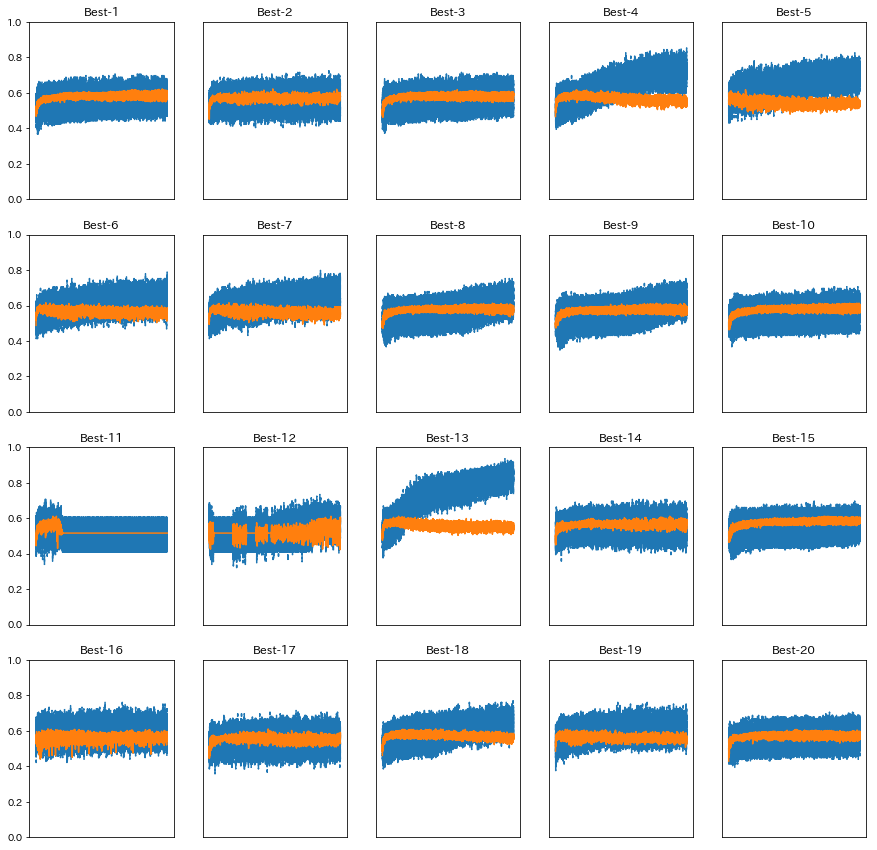

In [2197]:
# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0)

for key, train_acc_list in sorted(results_train.items(), key=lambda x:max(x[1]), reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(max(train_acc_list)) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(train_acc_list))
    plt.plot(x, results_val[key], "--")
    plt.plot(x, train_acc_list)
    i += 1

    if i >= graph_draw_num:
        break

plt.show()




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

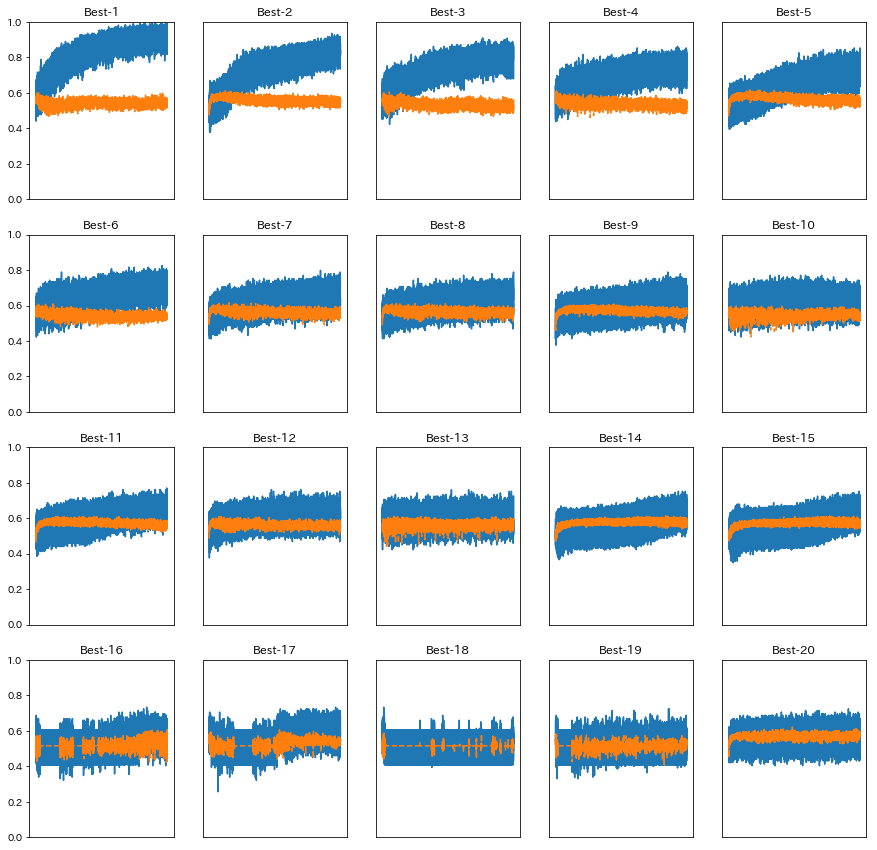

In [2175]:
# ハイパーパラメータのランダム探索======================================
optimization_trial = 50
results_val = {}
results_train = {}

random_parameter_list = []

for _ in range(optimization_trial):
    
    random_parameter_list.append((9 ** np.random.uniform(-4, -1), 10 ** np.random.uniform(-5, -2)
                                  , 10 ** np.random.uniform(-1, 0), 10 ** np.random.uniform(-6, -2)))

for random_parameter in random_parameter_list:
    
    val_acc_list, train_acc_list = _train(*random_parameter)
    print("val acc:" + str(max(val_acc_list)) + " | batch_norm_momentum:" + str(random_parameter[0]) + ", scale:" + str(random_parameter[1]) + ", dropout_rate:" + str(random_parameter[2]) + ", learning_rate:" + str(random_parameter[3]))
    key = "batch_norm_momentum:" + str(random_parameter[0]) + ", scale:" + str(random_parameter[1]) + ", dropout_rate:" + str(random_parameter[2]) + ", learning_rate:" + str(random_parameter[3])
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0)

for key, val_acc_list in sorted(results_val.items(), key=lambda x:max(x[1]), reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(max(val_acc_list)) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()



In [2173]:
sorted(results_val.items(), key=lambda x:max(x[1]), reverse=True)

[('batch_norm_momentum:0.0004262543451847171, scale:2.9375384576328274e-05, dropout_rate:0.1143098387631322, learning_rate:0.0029154431891537523',
  [0.6727273,
   0.6363636,
   0.48623854,
   0.5412844,
   0.6330275,
   0.49541286,
   0.6605505,
   0.56880736,
   0.4587156,
   0.5504587,
   0.47706422,
   0.56880736,
   0.48623854,
   0.5045872,
   0.58715594,
   0.57798165,
   0.51376146,
   0.58715594,
   0.5321101,
   0.6238532,
   0.58715594,
   0.5229358,
   0.559633,
   0.44036698,
   0.58715594,
   0.66972476,
   0.51376146,
   0.58715594,
   0.6513761,
   0.49541286,
   0.56880736,
   0.51376146,
   0.49541286,
   0.5321101,
   0.59090906,
   0.6272727,
   0.51376146,
   0.57798165,
   0.6055046,
   0.4678899,
   0.6055046,
   0.5321101,
   0.4678899,
   0.6146789,
   0.49541286,
   0.58715594,
   0.51376146,
   0.5229358,
   0.6055046,
   0.5963303,
   0.58715594,
   0.5321101,
   0.5504587,
   0.6146789,
   0.6055046,
   0.5045872,
   0.58715594,
   0.5045872,
   0.58715594,

# GRU

In [1191]:
GRU_training_test_data = training_test_data.drop(columns = ['nikkei_diff_open_close_neg'])

#GRU_predictor_vars = GRU_training_test_data[GRU_training_test_data.columns[1:]]
#GRU_explained_vars = GRU_training_test_data[GRU_training_test_data.columns[:1]]

In [821]:
GRU_training_test_data = GRU_training_test_data.drop(columns = ['nikkei_open_log_2', 'nikkei_open_log_3', 'nikkei_high_log_2',
                                                               'nikkei_high_log_3', 'nikkei_low_log_2', 'nikkei_low_log_3',
                                                               'nikkei_close_log_2', 'nikkei_close_log_3', 'nydow_close_log_2',
                                                               'nydow_close_log_3', 'nikkei_volume_2', 'nikkei_volume_3',
                                                               'exchange_2', 'exchange_3', 'Close_EURONEXT_log_2',
 'Close_EURONEXT_log_3',
 'Close_ALLORDS_log_2',
 'Close_ALLORDS_log_3',
 'Close_HANGSENG_log_2',
 'Close_HANGSENG_log_3',
 'Close_DAX_log_2',
 'Close_DAX_log_3',
 'Close_NYSE_log_2',
 'Close_NYSE_log_3',
 'Close_SP500_log_2',
 'Close_SP500_log_3'])

In [1192]:
# 入力データをステップ数(どの期間までを記憶させるか）ごとに切り出して整形
def transform_tensor(input_data, n_steps):
    
    tmp_GRU_predictor_vars = input_data.values if isinstance(input_data, pd.DataFrame) else input_data
    
    transform_GRU_predictor_vars = []
    for i in range(0, len(tmp_GRU_predictor_vars) - n_steps + 1):
        transform_GRU_predictor_vars.append(tmp_GRU_predictor_vars[i : i + n_steps, :])
    
    return np.array(transform_GRU_predictor_vars)

In [1193]:
#trans_GRU_training_test_data = transform_tensor(GRU_training_test_data.values[len(GRU_training_test_data) - 365 * 5:], 40)
trans_GRU_training_test_data = transform_tensor(GRU_training_test_data, 20)

# 学習用データは0.8 検証用データは0.2
len_index = len(trans_GRU_training_test_data)
training_data_size = int(len_index * 0.8)
test_data_size = len_index - training_data_size

GRU_training_predictor_vars = trans_GRU_training_test_data[:training_data_size, :, 1:]
GRU_training_explained_vars = trans_GRU_training_test_data[:training_data_size, :, :1]

GRU_test_predictor_vars = trans_GRU_training_test_data[training_data_size:, :, 1:]
GRU_test_explained_vars = trans_GRU_training_test_data[training_data_size:, :, :1]

In [1194]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [1196]:
reset_graph()

n_inputs = trans_GRU_training_test_data.shape[2] - 1
n_steps = 20
n_neurons = 400
n_outputs = 1
n_layers = 2

learning_rate = 0.0001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs], name = "X")
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs], name = "y")

input_keep_prob = tf.placeholder_with_default(1.0, shape=()) 
output_keep_prob = tf.placeholder_with_default(1.0, shape=())
gru_cells = [tf.contrib.rnn.GRUCell(num_units = n_neurons, name = "gru")
             for layer in range(n_layers)]
drop_cells = [tf.contrib.rnn.DropoutWrapper(gru_cell, input_keep_prob=input_keep_prob, output_keep_prob=output_keep_prob)
             for gru_cell in gru_cells]

#gru_cell = tf.contrib.rnn.GRUCell(num_units = n_neurons, name = "gru")

multi_cell = tf.contrib.rnn.MultiRNNCell(cells=drop_cells)

rnn_outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype = tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs, name = "stacked")
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

logits = tf.layers.dense(outputs, n_outputs, name = "logits")
y_pred = tf.cast(tf.greater(logits, 0.), tf.float32, name = "y_pred")
y_proba = tf.nn.sigmoid(logits, name = "y_proba")

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = logits)
loss = tf.reduce_mean(xentropy, name = "loss")
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(y_pred, y, name = "correct")
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "accuracy")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [1197]:
GRU_training_test_data.describe

,nikkei_diff_open_close_pos,nikkei_open_log_1,nikkei_open_log_2,nikkei_open_log_3,nikkei_high_log_1,nikkei_high_log_2,nikkei_high_log_3,nikkei_low_log_1,nikkei_low_log_2,nikkei_low_log_3,...,Close_HANGSENG_log_3,Close_DAX_log_1,Close_DAX_log_2,Close_DAX_log_3,Close_NYSE_log_1,Close_NYSE_log_2,Close_NYSE_log_3,Close_SP500_log_1,Close_SP500_log_2,Close_SP500_log_3
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,...,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,0.527158,0.000293,0.000290,0.000286,0.000292,0.000293,0.000287,0.000295,0.000294,0.000286,...,0.000095,0.000285,0.000289,0.000288,0.000217,0.000224,0.000224,0.000362,0.000367,0.000367
std,0.499367,0.012179,0.012178,0.012178,0.010659,0.010659,0.010662,0.012541,0.012540,0.012543,...,0.010617,0.011661,0.011662,0.011662,0.009061,0.009064,0.009064,0.008776,0.008779,0.008779
min,0.000000,-0.088574,-0.088574,-0.088574,-0.084363,-0.084363,-0.084363,-0.163191,-0.163191,-0.163191,...,-0.060183,-0.070673,-0.070673,-0.070673,-0.073116,-0.073116,-0.073116,-0.068958,-0.068958,-0.068958
25%,0.000000,-0.005204,-0.005204,-0.005215,-0.004125,-0.004125,-0.004132,-0.004817,-0.004817,-0.004834,...,-0.004434,-0.004532,-0.004532,-0.004532,-0.003082,-0.003075,-0.003075,-0.002735,-0.002735,-0.002735
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.006640,0.006611,0.006611,0.005657,0.005657,0.005657,0.006189,0.006189,0.006189,...,0.005198,0.005755,0.005759,0.005759,0.004346,0.004376,0.004376,0.004307,0.004324,0.004324
max,1.000000,0.079242,0.079242,0.079242,0.055208,0.055208,0.055208,0.088843,0.088843,0.088843,...,0.055187,0.052104,0.052104,0.052104,0.051173,0.051173,0.051173,0.046317,0.046317,0.046317


In [1198]:
loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [1199]:
n_epochs = 100
batch_size = 128
input_train_keep_prob = 0.5
output_train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        X_batches = np.array_split(GRU_training_predictor_vars, len(GRU_training_predictor_vars) // batch_size)
        y_batches = np.array_split(GRU_training_explained_vars, len(GRU_training_explained_vars) // batch_size)
        
        n_batches = len(X_batches)
        for X_batch, y_batch in zip(X_batches, y_batches):
            loss_val, _ = sess.run(
                [loss, training_op],
                feed_dict = {X: X_batch, y: y_batch, input_keep_prob: input_train_keep_prob, output_keep_prob: output_train_keep_prob})
            """loss_val, _ = sess.run(
                [loss, training_op],
                feed_dict = {X: X_batch, y: y_batch})"""
            #print((sess.run([logits, outputs], 
             #                 feed_dict = {X: X_batch, y: y_batch, input_keep_prob: input_train_keep_prob, output_keep_prob: output_train_keep_prob})))

            summary_str = loss_summary.eval(feed_dict = {X: X_batch, y: y_batch})
            step = epoch * n_batches
            file_writer.add_summary(summary_str, step)
        
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict = {X: GRU_test_predictor_vars, y: GRU_test_explained_vars})
        
        print("{:4d}  Train loss: {:.4f}, accuracy: {:.2f}%  Validation accuracy: {:.2f}%".format(
            epoch, loss_val, 100 * acc_train, 100 * acc_val))
        
        saver.save(sess, './my_gru')

   0  Train loss: 0.6934, accuracy: 48.13%  Validation accuracy: 51.07%
   1  Train loss: 0.6936, accuracy: 48.28%  Validation accuracy: 51.28%
   2  Train loss: 0.6934, accuracy: 49.18%  Validation accuracy: 51.39%
   3  Train loss: 0.6933, accuracy: 49.44%  Validation accuracy: 51.69%
   4  Train loss: 0.6927, accuracy: 49.70%  Validation accuracy: 51.74%
   5  Train loss: 0.6933, accuracy: 51.04%  Validation accuracy: 52.31%
   6  Train loss: 0.6930, accuracy: 52.05%  Validation accuracy: 51.93%
   7  Train loss: 0.6928, accuracy: 52.20%  Validation accuracy: 51.91%
   8  Train loss: 0.6928, accuracy: 52.20%  Validation accuracy: 51.84%
   9  Train loss: 0.6927, accuracy: 52.20%  Validation accuracy: 51.86%
  10  Train loss: 0.6926, accuracy: 52.20%  Validation accuracy: 51.86%
  11  Train loss: 0.6928, accuracy: 52.20%  Validation accuracy: 51.86%
  12  Train loss: 0.6926, accuracy: 52.20%  Validation accuracy: 51.86%
  13  Train loss: 0.6925, accuracy: 52.20%  Validation accuracy:

KeyboardInterrupt: 

In [ ]:
len(GRU_training_predictor_vars) 